In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christineibaraki/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
# data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")
data = pd.read_pickle("../../../all_clean_str_extant_posts.pkl")

In [4]:
print(f"rows in data: {len(data)}")

rows in data: 8983413


In [5]:
# data = data.sample(frac=0.001)
# print(f"rows in data: {len(data)}")
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean
0,"Another one of their smug, preachy ass headlin...","Another one of their smug, preachy ass headlin...",another one of their smug preachy ass headline...,70
1,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,105
2,That area from Abilene to border (I-20 to I-10...,That area from Abilene to border (I-20 to I-10...,that area from abilene to border i20 to i10 an...,92
3,She's got the politician fist point down,She's got the politician fist point down,shes got the politician fist point down,39
4,Imagine getting paid to drop three words on a ...,Imagine getting paid to drop three words on a ...,imagine getting paid to drop three words on a ...,62


In [6]:
def parse_vader_scores(post):
    score_dict = sid.polarity_scores(post)
    return score_dict['neg'], score_dict['neu'], score_dict['pos'], score_dict['compound']

In [7]:
processed_scores_columns = data.apply(
    lambda row: parse_vader_scores(row['text_clean_space']), axis='columns', result_type='expand')

KeyboardInterrupt: 

In [ ]:
processed_scores_columns.columns = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

In [9]:
processed_scores_columns.head()

,vader_neg,vader_neu,vader_pos,vader_compound
0,0.229,0.654,0.118,-0.4019
1,0.000,0.928,0.072,0.1027
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.189,0.811,0.000,-0.2732


In [10]:
data = pd.concat([data, processed_scores_columns],
                         axis='columns')

In [11]:
for index, row in data.sample(n=10).iterrows():
    print(row['text_clean_space'])
    print(row['vader_compound'])

The two Nigerian guys played that awesomely!
0.4003
The judge flips back and forth more than anyone i have ever seen.
0.0
INB4 "just don't use Twitter". How about no. They promote themselves as a neutral platform, which offers legal protections that publishers do not get. How about instead of me not using it, Twitter stops their bias, or, if not, loses platform status so that people who've been slandered by cucks can sue them into oblivion. I'm tired of cuckservatives not standing up for our 1A rights.
-0.2589
Desperate times called for a scripted take down attempt by the Dems. It was a total failure. Biden now under renewed scrutiny. I bet Obama was the puppet master. Sad
-0.8271
TRUTH
0.3182
Breitbart is getting bad lately. I dont think this is a new thing though
-0.5423
Saved
0.4215
Your points are actually more interesting than I originally thought. I agree that altruism can be quite pointless, and it is if it only happens in the way you describe. However, I don't believe it only h

In [12]:
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_neg,vader_neu,vader_pos,vader_compound
0,"Another one of their smug, preachy ass headlin...","Another one of their smug, preachy ass headlin...",another one of their smug preachy ass headline...,70,0.229,0.654,0.118,-0.4019
1,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,105,0.000,0.928,0.072,0.1027
2,That area from Abilene to border (I-20 to I-10...,That area from Abilene to border (I-20 to I-10...,that area from abilene to border i20 to i10 an...,92,0.000,1.000,0.000,0.0000
3,She's got the politician fist point down,She's got the politician fist point down,shes got the politician fist point down,39,0.000,1.000,0.000,0.0000
4,Imagine getting paid to drop three words on a ...,Imagine getting paid to drop three words on a ...,imagine getting paid to drop three words on a ...,62,0.189,0.811,0.000,-0.2732


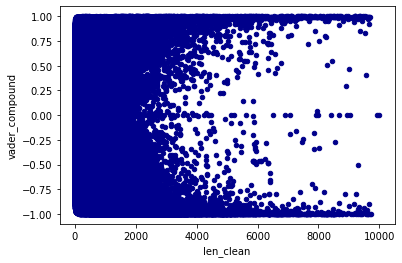

In [13]:
ax1 = data.plot.scatter(x='len_clean',
                      y='vader_compound',
                      c='DarkBlue')

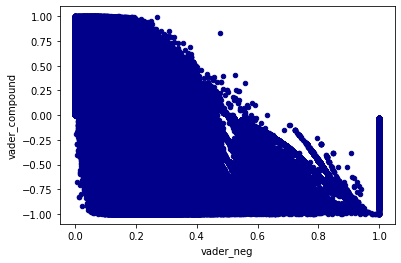

In [14]:
ax1 = data.plot.scatter(x='vader_neg',
                      y='vader_compound',
                      c='DarkBlue')

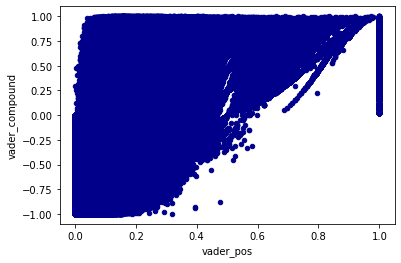

In [15]:
ax1 = data.plot.scatter(x='vader_pos',
                      y='vader_compound',
                      c='DarkBlue')

array([[<AxesSubplot:title={'center':'vader_compound'}>]], dtype=object)

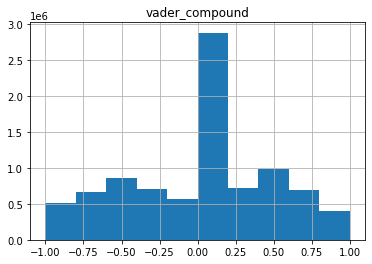

In [16]:
data.hist(column="vader_compound")

In [17]:
posts_pkl_path = os.path.join('..', '..', '..', "combined_bigquery_processed.pkl")
posts_df = pd.read_pickle(posts_pkl_path)

In [18]:
posts_df = posts_df['created_date']
posts_df.head()

0    2019-01-31
1    2019-02-03
2    2019-02-03
3    2019-02-02
4    2019-02-09
Name: created_date, dtype: object

In [19]:
data.shape

(8983413, 8)

In [20]:
data = data.merge(posts_df, left_index = True, right_index = True, how = 'left')

In [21]:
data.shape

(8983413, 9)

In [22]:
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_neg,vader_neu,vader_pos,vader_compound,created_date
0,"Another one of their smug, preachy ass headlin...","Another one of their smug, preachy ass headlin...",another one of their smug preachy ass headline...,70,0.229,0.654,0.118,-0.4019,2019-01-31
1,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,105,0.000,0.928,0.072,0.1027,2019-02-03
2,That area from Abilene to border (I-20 to I-10...,That area from Abilene to border (I-20 to I-10...,that area from abilene to border i20 to i10 an...,92,0.000,1.000,0.000,0.0000,2019-02-03
3,She's got the politician fist point down,She's got the politician fist point down,shes got the politician fist point down,39,0.000,1.000,0.000,0.0000,2019-02-02
4,Imagine getting paid to drop three words on a ...,Imagine getting paid to drop three words on a ...,imagine getting paid to drop three words on a ...,62,0.189,0.811,0.000,-0.2732,2019-02-09


In [43]:
data['date'] = pd.to_datetime(data['created_date'], format='%Y-%m-%d')
data['date'] = data['date'].dt.date

In [44]:
data['date'].describe()

count        8983413
unique           366
top       2019-02-05
freq           54878
Name: date, dtype: object

In [66]:
def plot_seven_day_moving_avg(df, col, title, y_axis, counts=False):
    
    if counts:
        compound_date = df.groupby(['date'])[col].size().reset_index()
        compound_date.set_index('date', inplace=True)
    else:
        compound_date = df.groupby(['date'])[col].mean().reset_index()
        compound_date.set_index('date', inplace=True)
    
    MOVING_AVG_WINDOW = 7
    compound_date['7_day_avg'] = (compound_date[col].
            rolling(window=MOVING_AVG_WINDOW).mean())
    
    plt.figure(figsize=(20,6))
    ax = compound_date['7_day_avg'].plot(linewidth=0.5)
    plt.ylabel(y_axis, size=15)
    plt.xlabel("Date", size=15)
    plt.title(title, size=18)
    # Major ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_major_locator(fmt_month)

    plt.axvline(dt.datetime(2019, 6, 26))

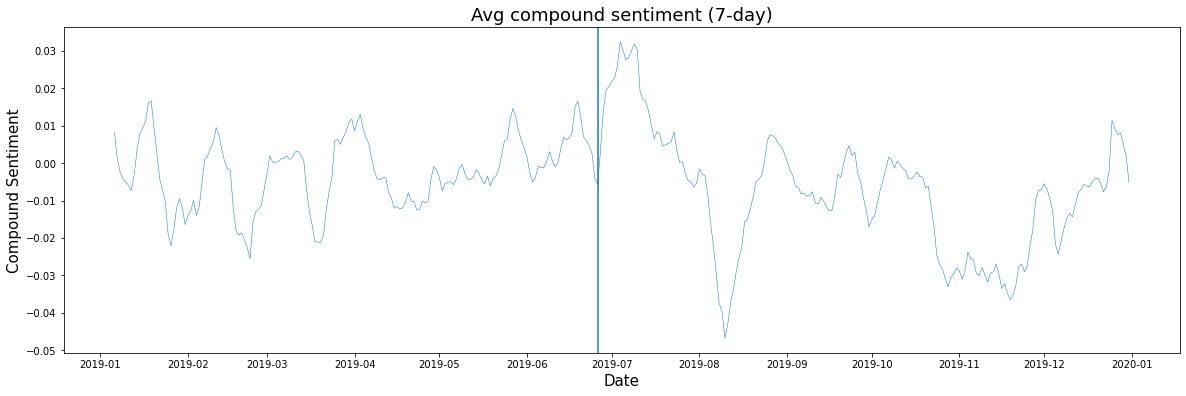

In [67]:
plot_seven_day_moving_avg(data, 'vader_compound', 'Avg compound sentiment (7-day)', 'Compound Sentiment')

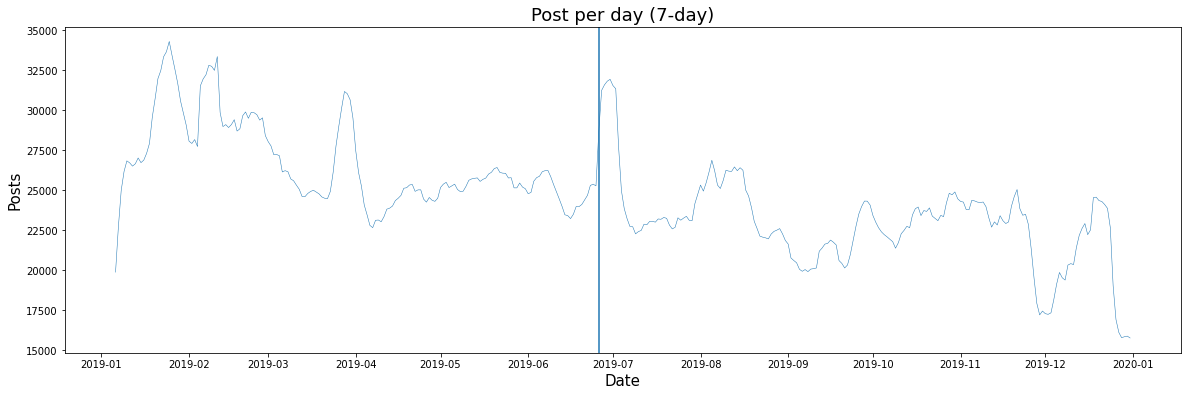

In [68]:
plot_seven_day_moving_avg(data, 'vader_compound', 'Post per day (7-day)', 'Posts', True)

In [27]:
# processed_scores_columns.to_pickle("../../all_sentiment_vader.pkl")

In [69]:
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_neg,vader_neu,vader_pos,vader_compound,created_date,date
0,"Another one of their smug, preachy ass headlin...","Another one of their smug, preachy ass headlin...",another one of their smug preachy ass headline...,70,0.229,0.654,0.118,-0.4019,2019-01-31,2019-01-31
1,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,enema has been pretending to be a rapper for y...,105,0.000,0.928,0.072,0.1027,2019-02-03,2019-02-03
2,That area from Abilene to border (I-20 to I-10...,That area from Abilene to border (I-20 to I-10...,that area from abilene to border i20 to i10 an...,92,0.000,1.000,0.000,0.0000,2019-02-03,2019-02-03
3,She's got the politician fist point down,She's got the politician fist point down,shes got the politician fist point down,39,0.000,1.000,0.000,0.0000,2019-02-02,2019-02-02
4,Imagine getting paid to drop three words on a ...,Imagine getting paid to drop three words on a ...,imagine getting paid to drop three words on a ...,62,0.189,0.811,0.000,-0.2732,2019-02-09,2019-02-09


In [70]:
summer_data = data[(data["created_date"] > '2019-05-31') & (data["created_date"] < '2019-08-01')]


In [71]:
summer_data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_neg,vader_neu,vader_pos,vader_compound,created_date,date
2490481,Even if they hate Trump they could at least ac...,Even if they hate Trump they could at least ac...,even if they hate trump they could at least ac...,139,0.077,0.788,0.135,0.4133,2019-07-13,2019-07-13
2490482,Heterosexual reproduction is a mystery to admi...,Heterosexual reproduction is a mystery to admi...,heterosexual reproduction is a mystery to admi...,76,0.167,0.833,0.000,-0.2960,2019-07-02,2019-07-02
2490483,Were you expecting the actual pope?,Were you expecting the actual pope?,were you expecting the actual pope,34,0.000,1.000,0.000,0.0000,2019-07-15,2019-07-15
2490484,"Be fruitful and multiply, not fruity and blow ...","Be fruitful and multiply, not fruity and blow ...",be fruitful and multiply not fruity and blow a...,50,0.000,1.000,0.000,0.0000,2019-07-22,2019-07-22
2490485,The term has completely lost all meaning. It's...,The term has completely lost all meaning. It's...,the term has completely lost all meaning its j...,104,0.246,0.754,0.000,-0.5984,2019-07-28,2019-07-28


In [72]:
summer_data_sample = summer_data.sample(n=1500)

In [74]:
summer_data_sample.shape

(1500, 10)

In [76]:
summer_data_sample_restricted = summer_data_sample[['date','orig_selftext', 'text_clean_punc_lower']]
summer_data_sample_restricted.head()

,date,orig_selftext,text_clean_punc_lower
3605270,2019-06-27,So much word salad!,so much word salad
3844737,2019-06-25,It's pronounced Milly - walk - ayyyy.,its pronounced milly walk ayyyy
4113392,2019-06-14,#There are two kinds of people:\n\n**Criminals...,there are two kinds of people criminals and no...
3035067,2019-07-14,She really is. ����,she really is
3038117,2019-07-31,"I know what you mean, but it is not up to the ...",i know what you mean but it is not up to the b...


In [77]:
summer_data_sample_restricted['label'] = ""

<ipython-input-77-4af9ed899a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data_sample_restricted['label'] = ""


In [78]:
summer_data_sample_restricted.head()

,date,orig_selftext,text_clean_punc_lower,label
3605270,2019-06-27,So much word salad!,so much word salad,
3844737,2019-06-25,It's pronounced Milly - walk - ayyyy.,its pronounced milly walk ayyyy,
4113392,2019-06-14,#There are two kinds of people:\n\n**Criminals...,there are two kinds of people criminals and no...,
3035067,2019-07-14,She really is. ����,she really is,
3038117,2019-07-31,"I know what you mean, but it is not up to the ...",i know what you mean but it is not up to the b...,


In [86]:
set1 = summer_data_sample_restricted.iloc[0:500,]
set2 = summer_data_sample_restricted.iloc[500:1000,]
set3 = summer_data_sample_restricted.iloc[1000:,]
print(set1.shape)
print(set2.shape)
print(set3.shape)
set1.to_csv("set_1.csv")
set2.to_csv("set_2.csv")
set3.to_csv("set_3.csv")

(500, 4)
(500, 4)
(500, 4)
